# Imports

## Import dataset

In [1]:
import pandas as pd

# Load the CSV file
data = pd.read_csv('ECS171_FINAL_DATASET.csv')

# Display the first few rows of the dataset
print(data.head())

   ProductRelated  ProductRelated_Duration  BounceRates  ExitRates  \
0       -0.691003                -0.624348     3.667189   3.229316   
1       -0.668518                -0.590903    -0.457683   1.171473   
2       -0.691003                -0.624348     3.667189   3.229316   
3       -0.668518                -0.622954     0.573535   1.994610   
4       -0.488636                -0.296430    -0.045196   0.142551   

   OperatingSystems  Browser  Region  TrafficType  Weekend  Revenue  ...  \
0                 1        1       1            1        0        0  ...   
1                 2        2       1            2        0        0  ...   
2                 4        1       9            3        0        0  ...   
3                 3        2       2            4        0        0  ...   
4                 3        3       1            4        1        0  ...   

   Month_Nov  Month_Oct  Month_Sep  Quarter_Q1  Quarter_Q2  Quarter_Q3  \
0          0          0          0           1  

## Import libraries

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Data prep

## Train test split

In [4]:
# Splitting data into features and target
X = data.drop(columns=['Revenue'])
y = data['Revenue']

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to address class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train

## Classification

In [5]:
print("\n--- Classification Model ---")
# Training the Decision Tree Classifier
classification_model = DecisionTreeClassifier(random_state=42)
classification_model.fit(X_train_smote, y_train_smote)


--- Classification Model ---


DecisionTreeClassifier(random_state=42)

## Regression

In [6]:
regression_model = DecisionTreeRegressor(random_state=42)
regression_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

# Testing

## Classification

In [7]:
# Make predictions
y_pred = classification_model.predict(X_test)


# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("\nAccuracy:", accuracy)

Confusion Matrix:
 [[1606  449]
 [ 231  180]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.78      0.83      2055
           1       0.29      0.44      0.35       411

    accuracy                           0.72      2466
   macro avg       0.58      0.61      0.59      2466
weighted avg       0.78      0.72      0.75      2466


Accuracy: 0.7242497972424979


# Plotting

*Warning: Takes a while to run*

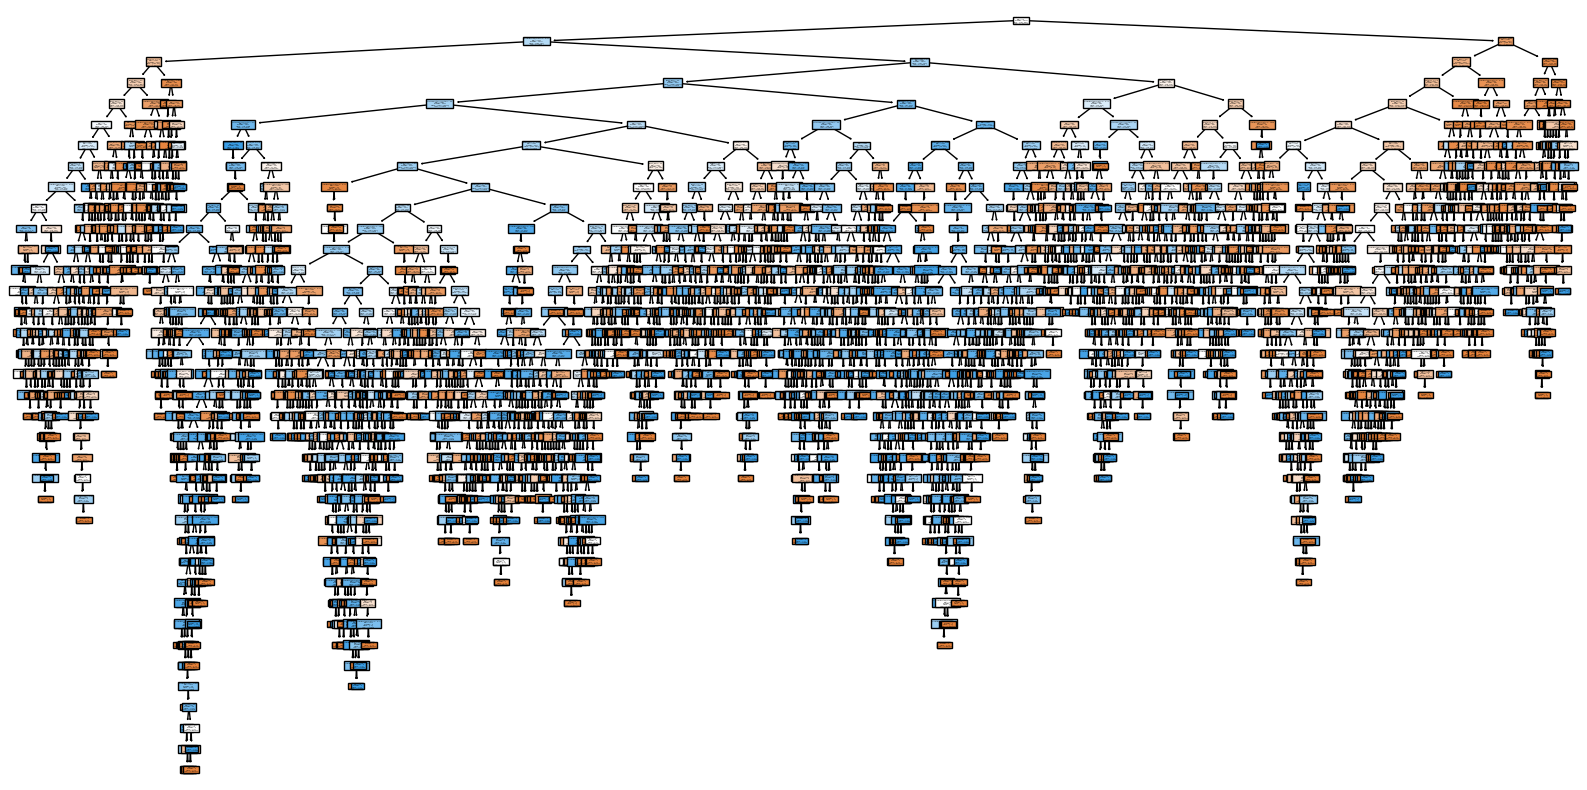

In [8]:
# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(classification_model, feature_names=X.columns, class_names=['No Revenue', 'Revenue'], filled=True)
plt.show()

# Evaluation

## Classification

In [30]:
y_pred_clf = classification_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_clf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_clf))

train_accuracy_clf = classification_model.score(X_train, y_train)
test_accuracy_clf = classification_model.score(X_test, y_test)

print(f"\nTraining Accuracy: {train_accuracy_clf}")
print(f"Test Accuracy: {test_accuracy_clf}")

# Cross-Validation for Classification
cv_scores_clf = cross_val_score(classification_model, X, y, cv=5)
print(f"\nCross-Validation Scores (Classification): {cv_scores_clf}")
print(f"Mean CV Score (Classification): {cv_scores_clf.mean()}")


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      2055
           1       0.26      0.24      0.25       411

    accuracy                           0.76      2466
   macro avg       0.55      0.55      0.55      2466
weighted avg       0.75      0.76      0.76      2466


Confusion Matrix:
[[1772  283]
 [ 312   99]]

Training Accuracy: 1.0
Test Accuracy: 0.7587185725871858

Cross-Validation Scores (Classification): [0.76926196 0.76642336 0.71654501 0.71938362 0.72952149]
Mean CV Score (Classification): 0.7402270884022708


Accuracy:

Test Accuracy: ~76% suggests the model is performing moderately well in predicting the correct classes on unseen data.
However, accuracy alone can be misleading, especially with imbalanced datasets.

**Precision, Recall, F1-Score:**

Class 0 (majority class):
Precision, recall, and F1-score are high (~85%+), indicating good performance for the majority class.

Class 1 (minority class):
Precision (~26%) and recall (~24%) are very low, showing the model struggles to correctly identify the minority class.
F1-score of 0.25 reflects poor overall performance on Class 1.
This is common in imbalanced datasets and indicates the need for improvement.

**Confusion Matrix:**

True Positives (Class 1): Only 99 out of 411 were correctly classified.
False Negatives (Class 1): 312 samples of Class 1 were misclassified as Class 0.
True Negatives (Class 0): 1772 samples of Class 0 were correctly classified.
False Positives (Class 0): 283 samples of Class 0 were misclassified as Class 1.

**Training Accuracy:**

The model achieves 100% accuracy on the training data, suggesting overfitting. The decision tree might be too complex and is memorizing the training data instead of generalizing.
Cross-Validation Scores:

Mean CV Score: ~74% aligns with the test accuracy, indicating the model's performance is consistent.

## Regression

In [38]:
mae = mean_absolute_error(y_test, y_pred_reg)
mse = mean_squared_error(y_test, y_pred_reg)
r2 = r2_score(y_test, y_pred_reg)

print(f"\nMean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Cross-Validation for Regression
cv_scores_reg = cross_val_score(regression_model, X, y, cv=5)
print(f"\nCross-Validation Scores (Regression): {cv_scores_reg}")
print(f"Mean CV Score (Regression): {cv_scores_reg.mean()}")


Mean Absolute Error: 0.24371451743714517
Mean Squared Error: 0.24371451743714517
R² Score: -0.7547445255474452

Cross-Validation Scores (Regression): [-1.3381736  -0.74664039 -1.04810188 -0.74778966 -0.84032118]
Mean CV Score (Regression): -0.9442053400119435


Mean Absolute Error (MAE):
0.2437: Indicates that, on average, the model's predictions deviate from the true values by ~0.24 (in the target's unit scale). Lower MAE values are better.

Mean Squared Error (MSE):
0.2437: The same as MAE in this case, but it usually gives higher weight to larger errors. Still, this value seems relatively high.

R² Score:
-0.7547: A negative R² suggests that the model performs worse than a simple mean-based prediction (baseline model). 
Essentially, the model is not explaining the variance in the data effectively.

Cross-Validation Scores:
Mean CV Score: ~-0.9442, which is consistent with the poor R² score. 
Cross-validation confirms the model's inability to generalize well across different folds of the dataset.